# **Implement k-NN with sk-learn**

This simple example aims to explain how to use `sciki-learn` to implement *k-NN* method for patter classification tasks, and then how to use `matplotlib` to visualize the results.

*Prerequisites*: basic understanding on *matplotlib* and *scikit-learn*.  


In this example, we use a small flower dataset, called [*iris*](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) to evaluate k-NN models. We load the iris dataset using `sklearn` and then split it into a train and test set.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)

print(iris.data)    # show the raw IRIS data
print(iris.target)  # show the target labels

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [ ]:
# create training and test sets

X = iris.data[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]   # load only two features and discard the other two
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Next, we test the accuracy of the kNN method on the test set for various values of k.

The core kNN function in sciki-learning is [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

for k in range(1,20):
  classifier = KNeighborsClassifier(n_neighbors=k)    # build kNN
  classifier.fit(X_train, y_train)                    # train kNN
  y_pred = classifier.predict(X_test)                 # predict on test set

  accuracy = accuracy_score(y_test, y_pred)*100
  print(f":kNN accuracy (k={k}) is {accuracy:.2f}%")

:kNN accuracy (k=1) is 97.37%
:kNN accuracy (k=2) is 94.74%
:kNN accuracy (k=3) is 100.00%
:kNN accuracy (k=4) is 100.00%
:kNN accuracy (k=5) is 100.00%
:kNN accuracy (k=6) is 100.00%
:kNN accuracy (k=7) is 100.00%
:kNN accuracy (k=8) is 100.00%
:kNN accuracy (k=9) is 100.00%
:kNN accuracy (k=10) is 100.00%
:kNN accuracy (k=11) is 100.00%
:kNN accuracy (k=12) is 100.00%
:kNN accuracy (k=13) is 100.00%
:kNN accuracy (k=14) is 97.37%
:kNN accuracy (k=15) is 100.00%
:kNN accuracy (k=16) is 100.00%
:kNN accuracy (k=17) is 100.00%
:kNN accuracy (k=18) is 100.00%
:kNN accuracy (k=19) is 100.00%


Finally, we use `matplotlib` to show the decision boundary of the k-NN method (when k=11). To do so, we first build the data processing pipeline in `sklearn` (with or without data normalization).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipeline with data normalization
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)
# pipeline without data normalization
# clf = Pipeline(
#      steps=[("knn", KNeighborsClassifier(n_neighbors=11))]
# )


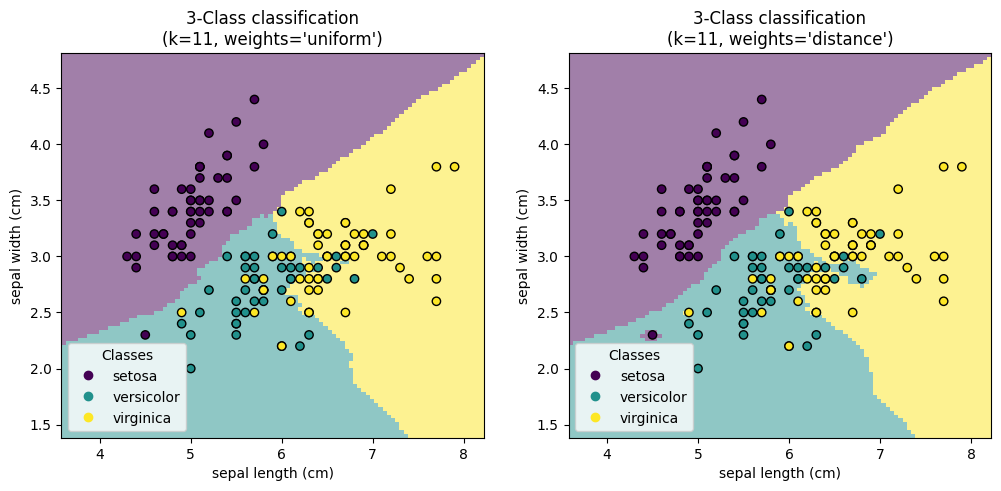

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

### **Exercise**

1.   Modify the above code to re-implement k-NN using all four features in the iris dataset. Compare the accuracy with k-NN using only two features and explain the results.

2.   Try to use a different distance measures in k-NN (consider various values for `metric` in [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)). Compare its decision boundary with that of the default distance measure.  

3.   Explain the role of the hyper-parameter $k$ in the k-NN methods.  

4.   Explain why the data normalization changes the decision boundary of k-NN methods.




Exercise
1. Prior to any changes, this was the accuracy of the dataset [available via image below]. After making the changes aka using all the parameters, it became more accurate.


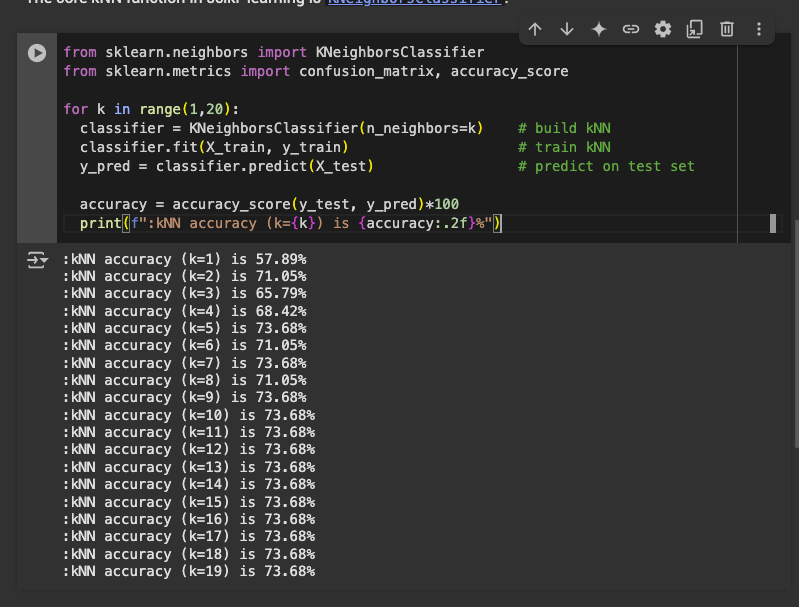

2. When you change the k-nn classifier, it changes the grid points boundary

What’s Happening in the Code?

1. Testing Different Ways to Measure Distance:
The code tries three distance measures:
-> Euclidean: Straight-line distance.

-> Manhattan: Distance using horizontal and vertical steps.

-> Chebyshev: The largest step needed in any direction.

2. Creating Boundaries:

A grid is made, like a map, to show which areas belong to each class (flower type) for different distance measures.

The k-NN model predicts the class for every point on this grid.

3. Visualizing Results:

The predictions are plotted side by side so you can easily compare how the boundaries look for each distance measure.


What You’ll Notice in the Visuals
1. Euclidean Distance (Default):
The boundaries are smooth and rounded because Euclidean uses straight-line distances.

2. Manhattan Distance:
The boundaries are more square or grid-like since Manhattan measures distance in steps along the axes (like city blocks).

3. Chebyshev Distance:
The boundaries are square-like but reflect the farthest distance in any direction.

Question 3

1. k controls the balance between capturing local detail and generalizing over the data.

2. Small k
k: More sensitive to data patterns but prone to overfitting.

3. Large k
k: More robust to noise but may oversimplify the decision boundaries.

Choosing the right
k
k is essential for achieving good performance with k-NN!

Question 4

Data normalization changes the decision boundary of k-NN because it ensures all features contribute equally to the distance calculation. This avoids bias toward features with larger scales and results in fairer and more accurate predictions. Normalization is particularly important in k-NN due to its sensitivity to distances.
